In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the clean dataset from the processed folder
# We use '..' to go up one level from 'notebooks' to the root, then down to 'data'
df = pd.read_csv('../data/processed/cleaned_cars.csv')

# Visual configuration for professional-style plots
sns.set_theme(style="whitegrid") # Sets a clean background
plt.rcParams['figure.figsize'] = (10, 6) # Sets default size for all plots

# Display the first few rows to verify data loading
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi


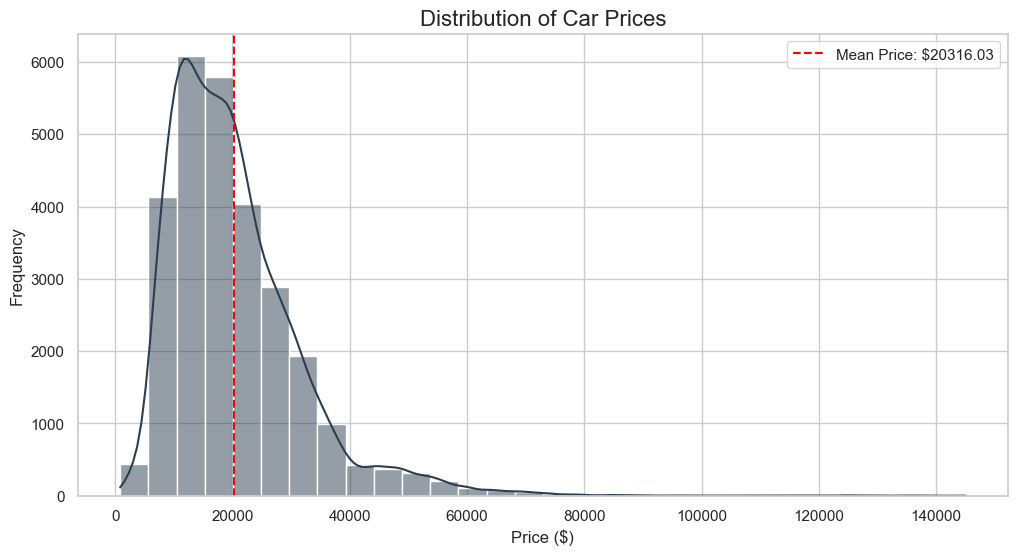

In [2]:
# 1. Analyze the distribution of the target variable: Price
plt.figure(figsize=(12, 6))

# Histogram with a Kernel Density Estimate (KDE) line
sns.histplot(df['price'], kde=True, color='#2c3e50', bins=30)

plt.title('Distribution of Car Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a vertical line for the mean price
plt.axvline(df['price'].mean(), color='red', linestyle='--', label=f"Mean Price: ${df['price'].mean():.2f}")
plt.legend()

plt.show()

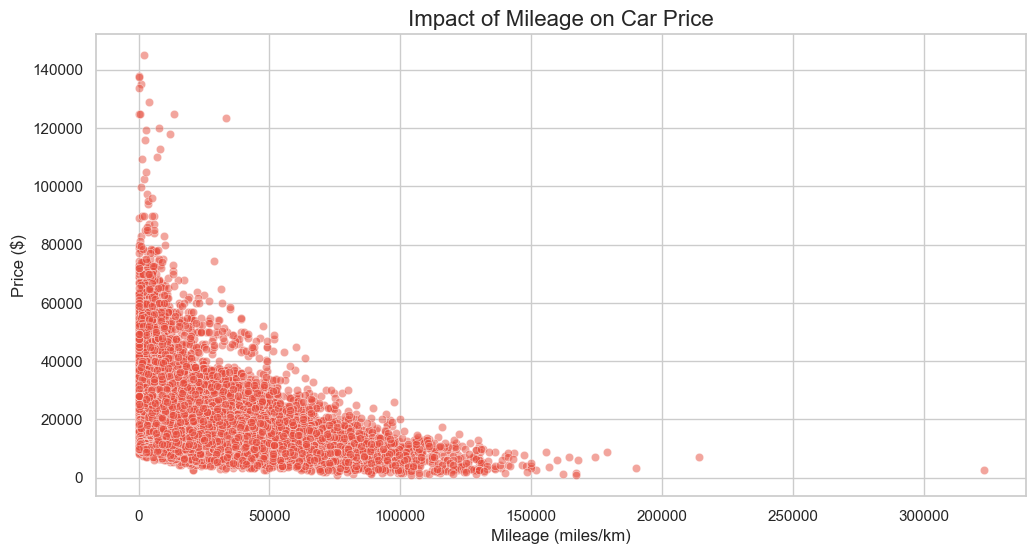

In [9]:
# 2. Relationship between Mileage and Price (Scatter Plot)
plt.figure(figsize=(12, 6))

# Using alpha=0.5 helps visualize overlapping points (density)
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5, color='#e74c3c')

plt.title('Impact of Mileage on Car Price', fontsize=16)
plt.xlabel('Mileage (miles/km)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

plt.show()

<Axes: xlabel='brand', ylabel='price'>

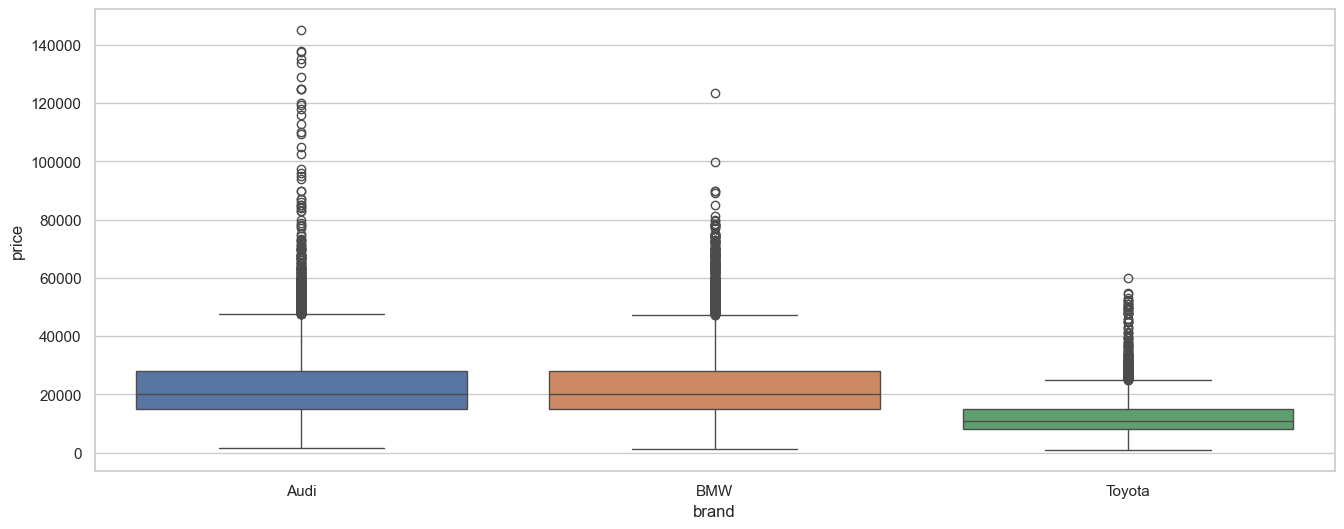

In [31]:
# 3. Price distribution by Brands (Boxplot)
plt.figure(figsize=(16, 6))

# With 'hue' we set the color change along the x-axis
sns.boxplot(data=df, x='brand', y='price', hue='brand')

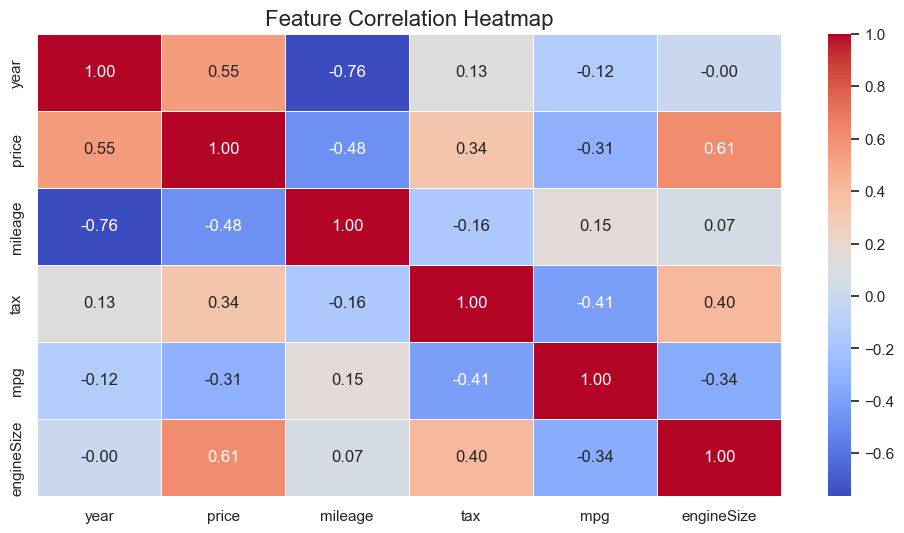

In [34]:
# 4. Correlation Analysis (Heatmap)
plt.figure(figsize=(12, 6))

# We explicitly select columns with data types 'float64' or 'int64'.
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the Heatmap
# annot=True: Writes the correlation value inside each square
# cmap='coolwarm': Red for positive correlation, Blue for negative.
# fmt=".2f": Shows only 2 decimal places to keep it clean.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()